In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
movies = pd.read_csv(r"C:\Users\LENOVO\Downloads\movie_data\movies.csv")
links = pd.read_csv(r"C:\Users\LENOVO\Downloads\movie_data\links.csv")
ratings = pd.read_csv(r"C:\Users\LENOVO\Downloads\movie_data\ratings.csv")
tags = pd.read_csv(r"C:\Users\LENOVO\Downloads\movie_data\tags.csv")

In [30]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [31]:
movies.shape

(9742, 3)

In [32]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [33]:
ratings.shape

(100836, 4)

In [34]:
unique = ratings['userId'].nunique()
unique

610

### Which movie has recieved maximum number of user ratings?

In [35]:
movies.merge(ratings,on ="movieId").groupby("title")\
["rating"].count().reset_index()\
.sort_values(by ='rating',ascending= False).head(1)

,title,rating
3158,Forrest Gump (1994),329


In [36]:
merged = pd.merge(ratings, movies, on='movieId')
rating_count = merged.groupby('title')['rating'].count()
max_rating_movie = rating_count.idxmax()

max_rating_movie

'Forrest Gump (1994)'

### Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [37]:
matrix_movie_id = movies[movies['title'] == 'Matrix, The (1999)']['movieId'].values[0]
matrix_tags = tags[tags['movieId'] == matrix_movie_id]['tag']
unique_tags = matrix_tags.unique()

unique_tags

array(['martial arts', 'sci-fi', 'alternate universe', 'philosophy',
       'post apocalyptic'], dtype=object)

### What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [38]:
terminator2_movie_id = movies[movies['title'] == 'Terminator 2: Judgment Day (1991)']['movieId'].values[0]
terminator2_ratings = ratings[ratings['movieId'] == terminator2_movie_id]['rating']
average_rating = terminator2_ratings.mean()

average_rating

3.970982142857143

### How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

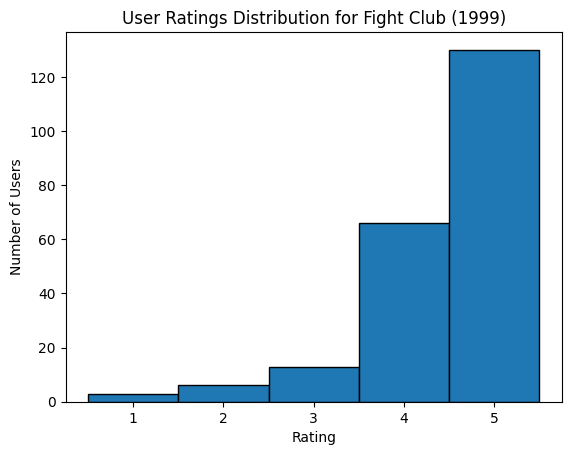

In [16]:
fight_club_movie_id = movies[movies['title'] == 'Fight Club (1999)']['movieId'].values[0]
fight_club_ratings = ratings[ratings['movieId'] == fight_club_movie_id]['rating']
plt.hist(fight_club_ratings, bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], edgecolor='black')
plt.title('User Ratings Distribution for Fight Club (1999)')
plt.xlabel('Rating')
plt.ylabel('Number of Users')
plt.show()

### Which movie is the most popular based on  average user ratings?

In [17]:
group_ratings = ratings.groupby('movieId')['rating'].agg(['count', 'mean'])
merged = pd.merge(movies, group_ratings, on='movieId', how='inner')
filtered = merged[merged['count'] > 50]
most_pop_movie = filtered[filtered['mean'] == filtered['mean'].max()]


print(most_pop_movie[['title', 'mean']])

                                title      mean
277  Shawshank Redemption, The (1994)  4.429022


#### Select all the correct options which comes under top 5 popular movies based on number of user ratings.

In [18]:
group_rating = ratings.groupby('movieId')['rating'].agg(['count', 'mean'])
merged = pd.merge(movies, group_rating, on='movieId', how='inner')
filtered = merged[merged['count'] > 50]
top5_pop_movies = filtered.nlargest(5, 'count')


print(top5_pop_movies[['title', 'count']])

                                 title  count
314                Forrest Gump (1994)    329
277   Shawshank Redemption, The (1994)    317
257                Pulp Fiction (1994)    307
510   Silence of the Lambs, The (1991)    279
1938                Matrix, The (1999)    278


#### Which Sci-Fi movie is "third most popular" based on the number of user ratings?

In [22]:
group_rating = ratings.groupby('movieId')['rating'].agg(['count', 'mean'])
merged = pd.merge(movies, group_rating, on='movieId', how='inner')
filtered = merged[merged['count'] > 50]
scifi_movies = filtered[filtered['genres'].str.contains('Sci-Fi')]
third_most_pop_scifi_movie = scifi_movies.nlargest(3, 'count').iloc[-1]


print(third_most_pop_scifi_movie[['title', 'count']])

title    Jurassic Park (1993)
count                     238
Name: 418, dtype: object


### Mention the movieId of the movie which has the highest IMDB rating.

In [23]:
merged = pd.merge(movies, ratings, on='movieId', how='inner')
avg_rating = merged.groupby('movieId')['rating'].mean()
high_rated_movie_id = avg_rating.idxmax()

high_rated_movie_id

53

### Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating.

In [24]:
merged = pd.merge(movies, ratings, on='movieId', how='inner')
avg_rating = merged.groupby('movieId')['rating'].mean()

high_rated_scifi_movie_id = (
    merged[merged['genres'].str.contains('Sci-Fi')]
    .groupby('movieId')['rating']
    .mean()
    .idxmax()
)

high_rated_scifi_movie_id

3687